<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [2]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


Obtaining file:///home/ivelin/canswim
  Preparing metadata (setup.py) ... done
  Attempting uninstall: canswim
    Found existing installation: canswim 0.0.1
    Uninstalling canswim-0.0.1:
      Successfully uninstalled canswim-0.0.1
  Running setup.py develop for canswim


## Prepare Model

### Load Data

In [3]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()

canswim_model.load_data()


n_test_range_days: 630
min_samples: 1890
Configuring CUDA GPU
earnings_loaded_df.columns Index(['symbol', 'date', 'eps', 'epsEstimated', 'time', 'revenue',
       'revenueEstimated', 'updatedFromDate', 'fiscalDateEnding'],
      dtype='object')


In [4]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

### Prepare Data

In [97]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



n_stocks:  50
n_epochs:  10
Training loop stock subset: ['MDT', 'IRM', 'QUAD', 'EVC', 'PFS', 'GLRE', 'ETN', 'VCEL', 'ITI', 'AGX', 'AJG', 'MRK', 'K', 'WBS', 'BCC', 'DY', 'ONB', 'HPP', 'SPNS', 'VPG', 'APLE', 'GOOGL', 'DHR', 'FSLR', 'RVTY', 'AMBC', 'VTNR', 'OMC', 'IESC', 'HBIO', 'AWR', 'GLDD', 'GWRE', 'BGS', 'WMB', 'CENTA', 'FRPT', 'SHO', 'PBH', 'MTX', 'DOOR', 'EXC', 'VOXX', 'CLB', 'HFWA', 'EMR', 'CLMB', 'BSRR', 'LRCX', 'PEB']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
Skipping RVTY due to error:  "['RVTY'] not in index"
Skipping RVTY covariates stack due to error:  'RVTY'
No analyst estimates available for VTNR
No analyst estimates available for VTNR
Added holidays to ticker series.
Removing time series for tickers with incomplete data sets: {'VTNR', 'CLMB', 'RVTY'}. Keeping

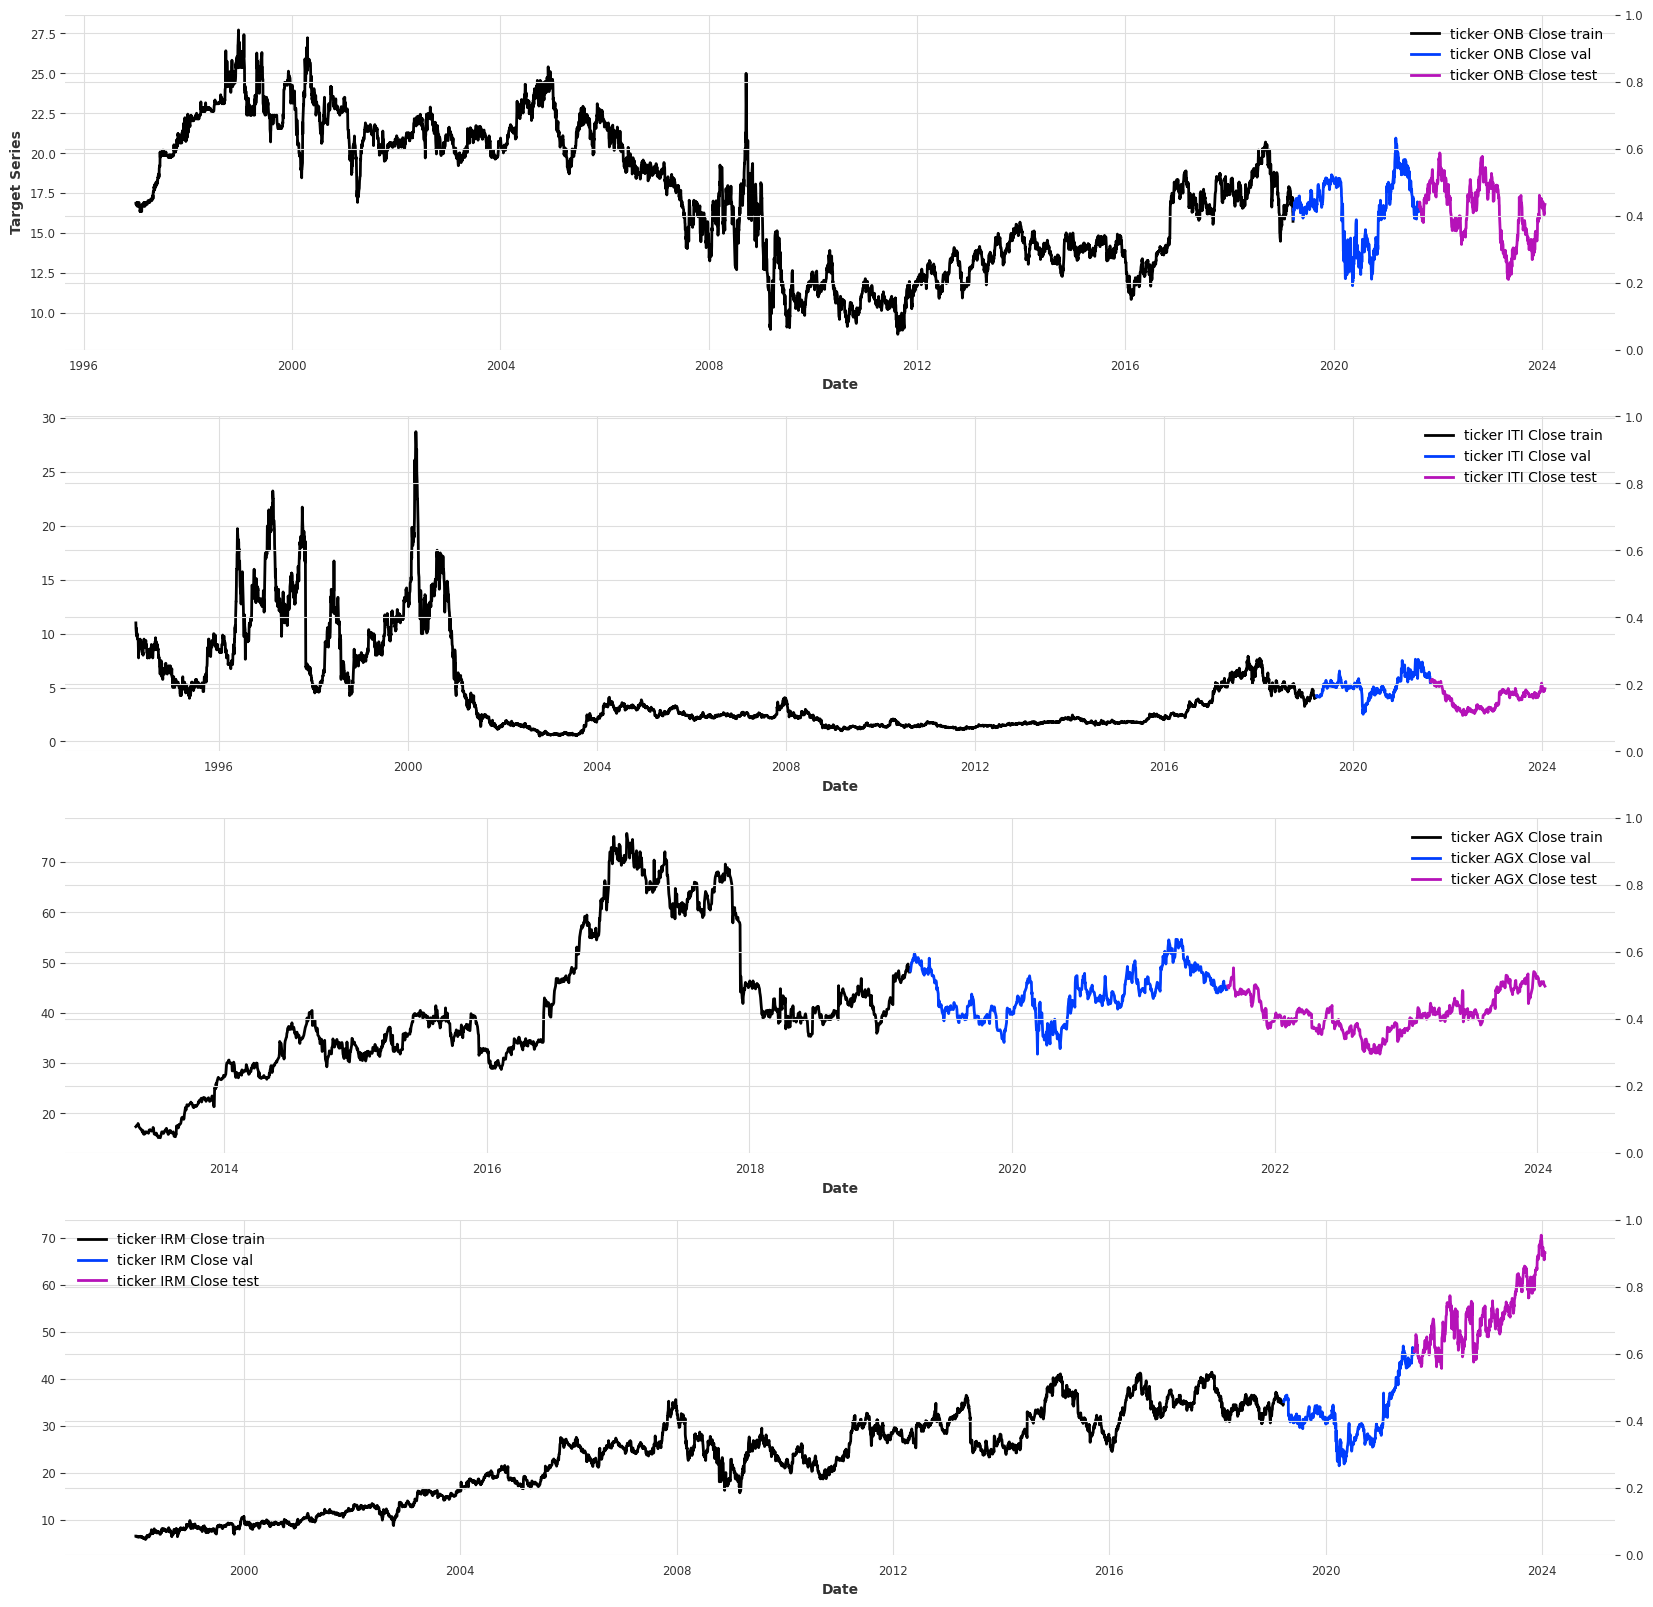

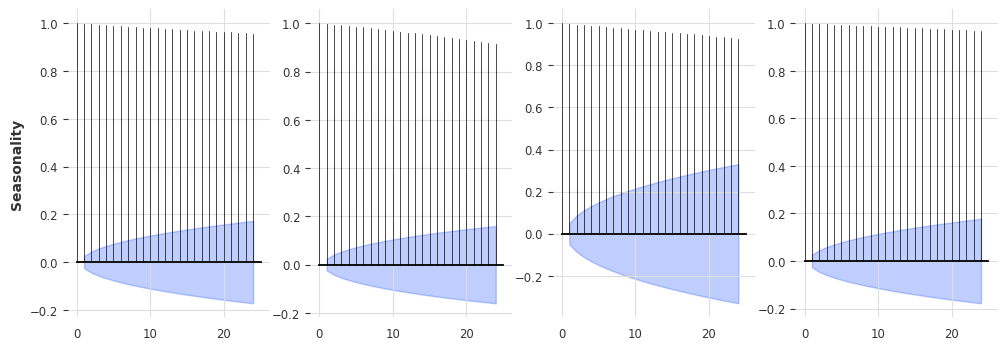

In [127]:
prepare_data()

In [99]:
canswim_model.stock_tickers

['IBOC',
 'NVAX',
 'QLYS',
 'CENT',
 'OCFC',
 'CMI',
 'SPTN',
 'MRNS',
 'MGPI',
 'PRTA',
 'AMBA',
 'INCY',
 'AORT',
 'KFRC',
 'DRI',
 'MMC',
 'NVGS',
 'EQT',
 'TRMK',
 'CE',
 'BGC',
 'EFSC',
 'ED',
 'VC',
 'VRTS',
 'ATEN',
 'CB',
 'UBS',
 'BXMT',
 'SJW',
 'EA',
 'PR',
 'VRSK',
 'UNP',
 'HOLX',
 'HWC',
 'LKFN',
 'INGN',
 'ABBV',
 'GNW',
 'ETN',
 'TSCO',
 'AGO',
 'ASML',
 'CDP',
 'RMNI',
 'MGM',
 'HD',
 'MGEE',
 'GEL']

In [100]:
t = list(canswim_model.targets.target_series.keys())[0]
t

'ABBV'

In [101]:
canswim_model.target_train_list[0].pd_dataframe()

component,Close
Date,
2013-12-31,52.810001
2014-01-01,52.395000
2014-01-02,51.980000
2014-01-03,52.299999
2014-01-06,50.389999
...,...
2019-03-18,80.650002
2019-03-19,80.820000
2019-03-20,80.430000


In [102]:
future_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)
past_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)

In [103]:
len(canswim_model.targets_list)

43

In [104]:
len(canswim_model.target_train_list)

43

In [105]:
len(canswim_model.past_cov_list)

43

In [106]:
len(canswim_model.future_cov_list)

43

## Find optimal hyper parameters

In [107]:
canswim_model.find_model()


[I 2024-01-27 17:00:12,006] A new study created in memory with name: no-name-45957824-c702-4268-b99a-6dda3167e946


  0%|          | 0/100 [00:00<?, ?it/s]

Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 7.2 M 
6 | decoders              | Sequential       | 9.6 M 
7 | temporal_decoder      | _ResidualBlock   | 3.5 K 
8 | lookback_skip         | Linear           | 136 K 
-----------------------------------------------------------
17.2 M    Trainable params
0         Non-trainable params
17.2 M    Total params
68.968    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 1064003.796


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 786453.885 >= min_delta = 0.001. New best score: 277549.911


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 149989.024 >= min_delta = 0.001. New best score: 127560.887


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 40751.820 >= min_delta = 0.001. New best score: 86809.067


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 86809.067. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 44360.61623836537 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f386a210>
[I 2024-01-27 17:50:29,552] Trial 0 finished with value: 44360.61623836537 and parameters: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 16, 'dropout': 0.2, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0005514256082877291}. Best is trial 0 with value: 44360.61623836537.
Current value: 44360.61623836537, Current params: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 16, 'dropout': 0.2, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0005514256082877291}
Best value: 44360.61623836537, Best params: {'input_chunk_length': 462, 'output_chunk_length': 42,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.7 M 
7 | decoders              | Sequential       | 9.6 M 
8 | temporal_decoder      | _ResidualBlock   | 11.4 K
9 | lookback_skip         | Linear           | 129 K 
-----------------------------------------------------------
18.7 M    Trainable params
0         Non-trainable params
18.7 M    Total params
74.606    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 162340707.821


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 68800386.606 >= min_delta = 0.001. New best score: 93540321.215


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 28354612.300 >= min_delta = 0.001. New best score: 65185708.914


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 21684445.919 >= min_delta = 0.001. New best score: 43501262.996


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 17384489.768 >= min_delta = 0.001. New best score: 26116773.228


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 9653751.640 >= min_delta = 0.001. New best score: 16463021.588


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 5814822.948 >= min_delta = 0.001. New best score: 10648198.641


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2370732.276 >= min_delta = 0.001. New best score: 8277466.365


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1667575.330 >= min_delta = 0.001. New best score: 6609891.035


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 886831.540 >= min_delta = 0.001. New best score: 5723059.495
`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 748060.1389656157 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f44bbbd0>
[I 2024-01-27 19:29:17,355] Trial 1 finished with value: 748060.1389656157 and parameters: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 112, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 2.191664488807869e-05}. Best is trial 0 with value: 44360.61623836537.
Current value: 748060.1389656157, Current params: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 112, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 2.191664488807869e-05}
Best value: 44360.61623836537, Best params: {'input_chunk_length': 462, 'output_chunk_length': 42,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 37.4 K
4 | future_cov_projection | _ResidualBlock   | 40.5 K
5 | encoders              | Sequential       | 1.4 M 
6 | decoders              | Sequential       | 4.2 M 
7 | temporal_decoder      | _ResidualBlock   | 10.8 K
8 | lookback_skip         | Linear           | 99.7 K
-----------------------------------------------------------
5.8 M     Trainable params
0         Non-trainable params
5.8 M     Total params
23.287    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 48086796032.474


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 48086796032.474. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 22725174794.99929 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f7da7190>
[I 2024-01-27 19:40:03,122] Trial 2 finished with value: 22725174794.99929 and parameters: {'input_chunk_length': 273, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.022397600476748505}. Best is trial 0 with value: 44360.61623836537.
Current value: 22725174794.99929, Current params: {'input_chunk_length': 273, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.022397600476748505}
Best value: 44360.61623836537, Best params: {'input_chunk_length': 462, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 6.1 M 
6 | decoders              | Sequential       | 4.2 M 
7 | temporal_decoder      | _ResidualBlock   | 4.7 K 
8 | lookback_skip         | Linear           | 74.4 K
-----------------------------------------------------------
10.6 M    Trainable params
0         Non-trainable params
10.6 M    Total params
42.349    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 4297110.773


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 4297110.773. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2163460.3008294846 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ede70c10>
[I 2024-01-27 20:01:07,349] Trial 3 finished with value: 2163460.3008294846 and parameters: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 112, 'dropout': 0.30000000000000004, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0017620501649158664}. Best is trial 0 with value: 44360.61623836537.
Current value: 2163460.3008294846, Current params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 112, 'dropout': 0.30000000000000004, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0017620501649158664}
Best value: 44360.61623836537, Best params: {'input_chunk_lengt

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 74.3 K
4 | future_cov_projection | _ResidualBlock   | 80.5 K
5 | encoders              | Sequential       | 5.3 M 
6 | decoders              | Sequential       | 5.5 M 
7 | temporal_decoder      | _ResidualBlock   | 12.9 K
8 | lookback_skip         | Linear           | 129 K 
-----------------------------------------------------------
11.0 M    Trainable params
0         Non-trainable params
11.0 M    Total params
44.176    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 215883855311214752.000


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 95199539958734976.000 >= min_delta = 0.001. New best score: 120684315352479776.000


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 107857978599802080.000 >= min_delta = 0.001. New best score: 12826336752677696.000


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12826336752677696.000. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 7389304586371280.0 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f84bc2d0>
[I 2024-01-27 20:33:05,325] Trial 4 finished with value: 7389304586371280.0 and parameters: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 128, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.03240349411202714}. Best is trial 0 with value: 44360.61623836537.
Current value: 7389304586371280.0, Current params: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 128, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.03240349411202714}
Best value: 44360.61623836537, Best params: {'input_chunk_length': 462, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 37.4 K
4 | future_cov_projection | _ResidualBlock   | 40.5 K
5 | encoders              | Sequential       | 2.5 M 
6 | decoders              | Sequential       | 1.8 M 
7 | temporal_decoder      | _ResidualBlock   | 5.9 K 
8 | lookback_skip         | Linear           | 183 K 
-----------------------------------------------------------
4.5 M     Trainable params
0         Non-trainable params
4.5 M     Total params
18.091    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 1287211.468


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 747779.398 >= min_delta = 0.001. New best score: 539432.070


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 101311.501 >= min_delta = 0.001. New best score: 438120.569


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 284819.046 >= min_delta = 0.001. New best score: 153301.523


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 7754.979 >= min_delta = 0.001. New best score: 145546.544


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 145546.544. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 61998.87780945537 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ee0a6550>
[I 2024-01-27 20:59:06,971] Trial 5 finished with value: 61998.87780945537 and parameters: {'input_chunk_length': 504, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0006141292687658752}. Best is trial 0 with value: 44360.61623836537.
Current value: 61998.87780945537, Current params: {'input_chunk_length': 504, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0006141292687658752}
Best value: 44360.61623836537, Best params: {'input_chunk_length': 462, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 7.1 M 
6 | decoders              | Sequential       | 25.5 M
7 | temporal_decoder      | _ResidualBlock   | 16.7 K
8 | lookback_skip         | Linear           | 191 K 
-----------------------------------------------------------
33.0 M    Trainable params
0         Non-trainable params
33.0 M    Total params
132.143   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 40.563


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 8.089 >= min_delta = 0.001. New best score: 32.474


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 4.787 >= min_delta = 0.001. New best score: 27.687


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.460 >= min_delta = 0.001. New best score: 24.227


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 2.693 >= min_delta = 0.001. New best score: 21.533


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.929 >= min_delta = 0.001. New best score: 19.605


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.830 >= min_delta = 0.001. New best score: 18.774


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.682 >= min_delta = 0.001. New best score: 18.092


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.628 >= min_delta = 0.001. New best score: 17.464


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.453 >= min_delta = 0.001. New best score: 17.011
`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 4.647455350725981 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70121079bd10>
[I 2024-01-27 22:22:17,524] Trial 6 finished with value: 4.647455350725981 and parameters: {'input_chunk_length': 441, 'output_chunk_length': 62, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 1.0669894908211321e-05}. Best is trial 6 with value: 4.647455350725981.
Current value: 4.647455350725981, Current params: {'input_chunk_length': 441, 'output_chunk_length': 62, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 1.0669894908211321e-05}
Best value: 4.647455350725981, Best params: {'input_chunk_length': 441, 'output_chunk_length': 62,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 3.0 M 
8 | temporal_decoder      | _ResidualBlock   | 4.1 K 
9 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.689    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-27 22:29:20,223] Trial 7 pruned. Trial was pruned at epoch 0.
Current value: 4.174732933300926e+25, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 96, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 0.08275059076498928}
Best value: 4.647455350725981, Best params: {'input_chunk_length': 441, 'output_chunk_length': 62, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 1.0669894908211321e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 11.8 M
8 | temporal_decoder      | _ResidualBlock   | 8.3 K 
9 | lookback_skip         | Linear           | 115 K 
-----------------------------------------------------------
21.0 M    Trainable params
0         Non-trainable params
21.0 M    Total params
83.808    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-27 22:37:54,982] Trial 8 pruned. Trial was pruned at epoch 0.
Current value: 215678762.0089698, Current params: {'input_chunk_length': 315, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 0.0036253080609382213}
Best value: 4.647455350725981, Best params: {'input_chunk_length': 441, 'output_chunk_length': 62, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 1.0669894908211321e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 9.7 M 
6 | decoders              | Sequential       | 21.3 M
7 | temporal_decoder      | _ResidualBlock   | 11.4 K
8 | lookback_skip         | Linear           | 151 K 
-----------------------------------------------------------
31.4 M    Trainable params
0         Non-trainable params
31.4 M    Total params
125.689   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 955292.050


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 677834.082 >= min_delta = 0.001. New best score: 277457.968


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 146819.030 >= min_delta = 0.001. New best score: 130638.938


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 41333.938 >= min_delta = 0.001. New best score: 89305.000


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 36922.237 >= min_delta = 0.001. New best score: 52382.763


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 52382.763. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 28531.25590937766 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f76b8650>
[I 2024-01-27 23:34:45,882] Trial 9 finished with value: 28531.25590937766 and parameters: {'input_chunk_length': 378, 'output_chunk_length': 57, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 48, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0002731135739818514}. Best is trial 6 with value: 4.647455350725981.
Current value: 28531.25590937766, Current params: {'input_chunk_length': 378, 'output_chunk_length': 57, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 48, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.0002731135739818514}
Best value: 4.647455350725981, Best params: {'input_chunk_length': 441, 'output_chunk_length': 62,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 8.1 M 
7 | decoders              | Sequential       | 32.7 M
8 | temporal_decoder      | _ResidualBlock   | 5.4 K 
9 | lookback_skip         | Linear           | 155 K 
-----------------------------------------------------------
41.3 M    Trainable params
0         Non-trainable params
41.3 M    Total params
165.238   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 23.423


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.150 >= min_delta = 0.001. New best score: 20.274


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.564 >= min_delta = 0.001. New best score: 16.710


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.889 >= min_delta = 0.001. New best score: 15.821


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.109 >= min_delta = 0.001. New best score: 15.712


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.239 >= min_delta = 0.001. New best score: 15.474


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 15.474. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.3593498816327436 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70121087c110>
[I 2024-01-28 01:49:36,080] Trial 10 finished with value: 3.3593498816327436 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.043995850867283e-05}. Best is trial 10 with value: 3.3593498816327436.
Current value: 3.3593498816327436, Current params: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.043995850867283e-05}
Best value: 3.3593498816327436, Best params: {'input_chunk_length': 357, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 8.1 M 
7 | decoders              | Sequential       | 32.7 M
8 | temporal_decoder      | _ResidualBlock   | 5.4 K 
9 | lookback_skip         | Linear           | 155 K 
-----------------------------------------------------------
41.3 M    Trainable params
0         Non-trainable params
41.3 M    Total params
165.238   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 23.774


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.252 >= min_delta = 0.001. New best score: 20.522


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 3.702 >= min_delta = 0.001. New best score: 16.820


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.918 >= min_delta = 0.001. New best score: 15.902


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.408 >= min_delta = 0.001. New best score: 15.495


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.049 >= min_delta = 0.001. New best score: 15.445


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.199 >= min_delta = 0.001. New best score: 15.246


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.490226297506406 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120cc257d0>
[I 2024-01-28 04:04:58,697] Trial 11 finished with value: 3.490226297506406 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.0005029060794901e-05}. Best is trial 10 with value: 3.3593498816327436.
Current value: 3.490226297506406, Current params: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.0005029060794901e-05}
Best value: 3.3593498816327436, Best params: {'input_chunk_length': 357, 'output_chunk_length':

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 8.1 M 
7 | decoders              | Sequential       | 29.1 M
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 155 K 
-----------------------------------------------------------
37.7 M    Trainable params
0         Non-trainable params
37.7 M    Total params
150.987   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 16.562


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.359 >= min_delta = 0.001. New best score: 15.204


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 15.204. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.298244043825103 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120cbaf190>
[I 2024-01-28 05:12:36,235] Trial 12 finished with value: 3.298244043825103 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.938816115574294e-05}. Best is trial 12 with value: 3.298244043825103.
Current value: 3.298244043825103, Current params: {'input_chunk_length': 357, 'output_chunk_length': 62, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 16, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.938816115574294e-05}
Best value: 3.298244043825103, Best params: {'input_chunk_length': 357, 'output_chunk_length': 62,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 7.3 M 
7 | decoders              | Sequential       | 27.1 M
8 | temporal_decoder      | _ResidualBlock   | 8.1 K 
9 | lookback_skip         | Linear           | 126 K 
-----------------------------------------------------------
34.9 M    Trainable params
0         Non-trainable params
34.9 M    Total params
139.579   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 15.250


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.262 >= min_delta = 0.001. New best score: 13.988


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.988. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0570289725991415 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f2488d50>
[I 2024-01-28 06:13:47,368] Trial 13 finished with value: 3.0570289725991415 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.847725861346233e-05}. Best is trial 13 with value: 3.0570289725991415.
Current value: 3.0570289725991415, Current params: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.0, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.847725861346233e-05}
Best value: 3.0570289725991415, Best params: {'input_chunk_length': 315, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 7.3 M 
7 | decoders              | Sequential       | 20.7 M
8 | temporal_decoder      | _ResidualBlock   | 7.0 K 
9 | lookback_skip         | Linear           | 126 K 
-----------------------------------------------------------
28.5 M    Trainable params
0         Non-trainable params
28.5 M    Total params
113.871   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.530


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.530. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.1045958102560385 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ee3a2a50>
[I 2024-01-28 07:01:38,245] Trial 14 finished with value: 3.1045958102560385 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010943707011474696}. Best is trial 13 with value: 3.0570289725991415.
Current value: 3.1045958102560385, Current params: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010943707011474696}
Best value: 3.0570289725991415, Best params: {'input_chunk_length': 315, 'output_chunk_lengt

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 10.1 M
7 | decoders              | Sequential       | 20.7 M
8 | temporal_decoder      | _ResidualBlock   | 9.9 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
31.2 M    Trainable params
0         Non-trainable params
31.2 M    Total params
124.904   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.618


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.590 >= min_delta = 0.001. New best score: 14.028


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 14.028. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.2932942999267767 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f3d44310>
[I 2024-01-28 07:55:15,489] Trial 15 finished with value: 3.2932942999267767 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 48, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.201812584089426e-05}. Best is trial 13 with value: 3.0570289725991415.
Current value: 3.2932942999267767, Current params: {'input_chunk_length': 294, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 48, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.201812584089426e-05}
Best value: 3.0570289725991415, Best params: {'input_chunk_length': 315, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 7.3 M 
7 | decoders              | Sequential       | 20.7 M
8 | temporal_decoder      | _ResidualBlock   | 7.0 K 
9 | lookback_skip         | Linear           | 126 K 
-----------------------------------------------------------
28.5 M    Trainable params
0         Non-trainable params
28.5 M    Total params
113.871   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.614


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.614. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0348890574345413 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120d67f490>
[I 2024-01-28 08:43:05,817] Trial 16 finished with value: 3.0348890574345413 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00011113340848791337}. Best is trial 16 with value: 3.0348890574345413.
Current value: 3.0348890574345413, Current params: {'input_chunk_length': 315, 'output_chunk_length': 57, 'hidden_size': 1024, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00011113340848791337}
Best value: 3.0348890574345413, Best params: {'input_chunk_length': 315, 'output_chunk_lengt

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 13.5 M
7 | decoders              | Sequential       | 17.3 M
8 | temporal_decoder      | _ResidualBlock   | 7.0 K 
9 | lookback_skip         | Linear           | 103 K 
-----------------------------------------------------------
31.2 M    Trainable params
0         Non-trainable params
31.2 M    Total params
124.872   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.800


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.800. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8517718725378383 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120ae63f10>
[I 2024-01-28 09:31:41,515] Trial 17 finished with value: 2.8517718725378383 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010379772672322703}. Best is trial 17 with value: 2.8517718725378383.
Current value: 2.8517718725378383, Current params: {'input_chunk_length': 315, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010379772672322703}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_lengt

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.4 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 83.2 K
-----------------------------------------------------------
10.3 M    Trainable params
0         Non-trainable params
10.3 M    Total params
41.098    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.775


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.775. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0162637707380013 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ec1c1c50>
[I 2024-01-28 09:50:43,893] Trial 18 finished with value: 3.0162637707380013 and parameters: {'input_chunk_length': 252, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00018719351114362048}. Best is trial 17 with value: 2.8517718725378383.
Current value: 3.0162637707380013, Current params: {'input_chunk_length': 252, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00018719351114362048}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.4 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 10.8 K
9 | lookback_skip         | Linear           | 83.2 K
-----------------------------------------------------------
10.3 M    Trainable params
0         Non-trainable params
10.3 M    Total params
41.122    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.457


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.457. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.175882259304538 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120ae6d890>
[I 2024-01-28 10:09:37,710] Trial 19 finished with value: 3.175882259304538 and parameters: {'input_chunk_length': 252, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0002109828587945013}. Best is trial 17 with value: 2.8517718725378383.
Current value: 3.175882259304538, Current params: {'input_chunk_length': 252, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0002109828587945013}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_length': 47,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.6 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 6.8 K 
9 | lookback_skip         | Linear           | 90.1 K
-----------------------------------------------------------
10.5 M    Trainable params
0         Non-trainable params
10.5 M    Total params
41.908    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.166


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.166. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.2638286888051278 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120aa5d410>
[I 2024-01-28 10:29:26,368] Trial 20 finished with value: 3.2638286888051278 and parameters: {'input_chunk_length': 273, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0003257924455210031}. Best is trial 17 with value: 2.8517718725378383.
Current value: 3.2638286888051278, Current params: {'input_chunk_length': 273, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0003257924455210031}
Best value: 2.8517718725378383, Best params: {'input_chunk_lengt

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 1.9 M 
7 | decoders              | Sequential       | 4.1 M 
8 | temporal_decoder      | _ResidualBlock   | 7.0 K 
9 | lookback_skip         | Linear           | 97.1 K
-----------------------------------------------------------
6.2 M     Trainable params
0         Non-trainable params
6.2 M     Total params
24.943    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.032


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.032. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.1272254688861283 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120e00ba50>
[I 2024-01-28 10:43:03,918] Trial 21 finished with value: 3.1272254688861283 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00014484718398417252}. Best is trial 17 with value: 2.8517718725378383.
Current value: 3.1272254688861283, Current params: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00014484718398417252}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
11.1 M    Trainable params
0         Non-trainable params
11.1 M    Total params
44.305    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.447


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.557 >= min_delta = 0.001. New best score: 12.889


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.889. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8809951481934655 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120a9f1590>
[I 2024-01-28 11:11:22,601] Trial 22 finished with value: 2.8809951481934655 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.683227250345411e-05}. Best is trial 17 with value: 2.8517718725378383.
Current value: 2.8809951481934655, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.683227250345411e-05}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_length': 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.7 M 
7 | decoders              | Sequential       | 4.3 M 
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 131 K 
-----------------------------------------------------------
10.3 M    Trainable params
0         Non-trainable params
10.3 M    Total params
41.295    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 15.910


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.204 >= min_delta = 0.001. New best score: 14.706


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 14.706. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0788026822828503 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120aa7e910>
[I 2024-01-28 11:42:08,555] Trial 23 finished with value: 3.0788026822828503 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.898953353071524e-05}. Best is trial 17 with value: 2.8517718725378383.
Current value: 3.0788026822828503, Current params: {'input_chunk_length': 399, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.898953353071524e-05}
Best value: 2.8517718725378383, Best params: {'input_chunk_length': 315, 'output_chunk_length': 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 8.8 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
11.1 M    Trainable params
0         Non-trainable params
11.1 M    Total params
44.321    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.588


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.320 >= min_delta = 0.001. New best score: 13.268


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.268. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8629372098161805 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ff23cf90>
[I 2024-01-28 12:09:46,087] Trial 24 finished with value: 2.8629372098161805 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.7104636086163316e-05}. Best is trial 17 with value: 2.8517718725378383.
Current value: 2.8629372098161805, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.7104636086163316e-05}
Best value: 2.8517718725378383, Best params: {'input_chunk_len

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.1 M 
7 | decoders              | Sequential       | 1.4 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.899    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.961


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.281 >= min_delta = 0.001. New best score: 13.680


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.106 >= min_delta = 0.001. New best score: 12.574


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.574. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8448025055188726 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120e005490>
[I 2024-01-28 12:29:59,347] Trial 25 finished with value: 2.8448025055188726 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8448025055188726, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.3 M 
7 | decoders              | Sequential       | 1.6 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 137 K 
-----------------------------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.400    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 12:34:35,654] Trial 26 pruned. Trial was pruned at epoch 0.
Current value: 17.694100345264825, Current params: {'input_chunk_length': 378, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 2.0092619281429533e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.1 M 
7 | decoders              | Sequential       | 1.4 M 
8 | temporal_decoder      | _ResidualBlock   | 5.9 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.903    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.068


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.524 >= min_delta = 0.001. New best score: 12.544


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.544. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.252528041636493 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120dff8a90>
[I 2024-01-28 12:55:11,717] Trial 27 finished with value: 3.252528041636493 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.786971166401844e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.252528041636493, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.786971166401844e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.1 M 
7 | decoders              | Sequential       | 2.5 M 
8 | temporal_decoder      | _ResidualBlock   | 9.9 K 
9 | lookback_skip         | Linear           | 122 K 
-----------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.382    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.084


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.712 >= min_delta = 0.001. New best score: 13.372


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.384 >= min_delta = 0.001. New best score: 12.988


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.988. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.293177400199033 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f8b33a50>
[I 2024-01-28 13:16:01,016] Trial 28 finished with value: 3.293177400199033 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 96, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.0139381130995045e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.293177400199033, Current params: {'input_chunk_length': 336, 'output_chunk_length': 52, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 96, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.0139381130995045e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.2 M 
7 | decoders              | Sequential       | 3.1 M 
8 | temporal_decoder      | _ResidualBlock   | 10.8 K
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
5.5 M     Trainable params
0         Non-trainable params
5.5 M     Total params
21.982    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.401


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.401. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.9815836259623247 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f44a4250>
[I 2024-01-28 13:32:18,158] Trial 29 finished with value: 2.9815836259623247 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 256, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00047594315786903934}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.9815836259623247, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 256, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00047594315786903934}
Best value: 2.8448025055188726, Best params: {'input_chunk_len

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 4.6 M 
8 | temporal_decoder      | _ResidualBlock   | 7.0 K 
9 | lookback_skip         | Linear           | 97.1 K
-----------------------------------------------------------
13.5 M    Trainable params
0         Non-trainable params
13.5 M    Total params
53.891    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.511


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.511. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.9733268622958318 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f8aa3f90>
[I 2024-01-28 14:00:33,826] Trial 30 finished with value: 2.9733268622958318 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 96, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00015801546950101726}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.9733268622958318, Current params: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 96, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00015801546950101726}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 5.7 M 
8 | temporal_decoder      | _ResidualBlock   | 6.8 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
11.1 M    Trainable params
0         Non-trainable params
11.1 M    Total params
44.313    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 14:06:54,110] Trial 31 pruned. Trial was pruned at epoch 0.
Current value: 15.916330925666195, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 2.4336629201962564e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 7.0 M 
8 | temporal_decoder      | _ResidualBlock   | 10.8 K
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
12.4 M    Trainable params
0         Non-trainable params
12.4 M    Total params
49.740    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.323


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.133 >= min_delta = 0.001. New best score: 13.189


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.401 >= min_delta = 0.001. New best score: 12.788


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.788. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8999974745247004 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fa773fd0>
[I 2024-01-28 14:40:33,930] Trial 32 finished with value: 2.8999974745247004 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.8062289823057076e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8999974745247004, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.8062289823057076e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.5 M 
7 | decoders              | Sequential       | 5.1 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
10.9 M    Trainable params
0         Non-trainable params
10.9 M    Total params
43.463    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 14:47:18,237] Trial 33 pruned. Trial was pruned at epoch 0.
Current value: 15.735277850050489, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 16, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 2.4250493837771006e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 7.6 M 
7 | decoders              | Sequential       | 7.3 M 
8 | temporal_decoder      | _ResidualBlock   | 5.3 K 
9 | lookback_skip         | Linear           | 130 K 
-----------------------------------------------------------
15.3 M    Trainable params
0         Non-trainable params
15.3 M    Total params
61.224    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.100


Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 15:03:48,733] Trial 34 pruned. Trial was pruned at epoch 1.
Current value: 14.054070723607925, Current params: {'input_chunk_length': 357, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.57099144246362e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 37.4 K
4 | future_cov_projection | _ResidualBlock   | 40.6 K
5 | encoders              | Sequential       | 1.9 M 
6 | decoders              | Sequential       | 672 K 
7 | temporal_decoder      | _ResidualBlock   | 3.5 K 
8 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.977    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 15:07:20,521] Trial 35 pruned. Trial was pruned at epoch 0.
Current value: 26.389337474562534, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 1.856832455712771e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 3.8 M 
7 | decoders              | Sequential       | 7.0 M 
8 | temporal_decoder      | _ResidualBlock   | 10.8 K
9 | lookback_skip         | Linear           | 90.1 K
-----------------------------------------------------------
11.0 M    Trainable params
0         Non-trainable params
11.0 M    Total params
44.179    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 15:13:21,942] Trial 36 pruned. Trial was pruned at epoch 0.
Current value: 15.209815570674762, Current params: {'input_chunk_length': 273, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.328449002660083e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 9.1 M 
6 | decoders              | Sequential       | 9.1 M 
7 | temporal_decoder      | _ResidualBlock   | 5.2 K 
8 | lookback_skip         | Linear           | 122 K 
-----------------------------------------------------------
18.5 M    Trainable params
0         Non-trainable params
18.5 M    Total params
74.159    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 15:20:26,673] Trial 37 pruned. Trial was pruned at epoch 0.
Current value: 2987847.3636656757, Current params: {'input_chunk_length': 336, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 0.00010056747743084167}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.1 M 
7 | decoders              | Sequential       | 3.9 M 
8 | temporal_decoder      | _ResidualBlock   | 11.4 K
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
8.3 M     Trainable params
0         Non-trainable params
8.3 M     Total params
33.109    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 14.441


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.490 >= min_delta = 0.001. New best score: 12.951


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.778 >= min_delta = 0.001. New best score: 12.173


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.088 >= min_delta = 0.001. New best score: 12.085


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.085. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.00861028339239 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120d674b50>
[I 2024-01-28 15:55:35,519] Trial 38 finished with value: 3.00861028339239 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 112, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.2850651625240073e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.00861028339239, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 2, 'num_decoder_layers': 1, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 112, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.2850651625240073e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 37.4 K
4 | future_cov_projection | _ResidualBlock   | 40.5 K
5 | encoders              | Sequential       | 2.8 M 
6 | decoders              | Sequential       | 3.0 M 
7 | temporal_decoder      | _ResidualBlock   | 16.7 K
8 | lookback_skip         | Linear           | 159 K 
-----------------------------------------------------------
6.0 M     Trainable params
0         Non-trainable params
6.0 M     Total params
24.023    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 15:59:36,064] Trial 39 pruned. Trial was pruned at epoch 0.
Current value: 12842008.499927036, Current params: {'input_chunk_length': 483, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 128, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': False, 'lr': 1.9372255979865163e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.764    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.741


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.238 >= min_delta = 0.001. New best score: 13.503


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.503. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8525926073389716 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f44a44d0>
[I 2024-01-28 16:42:39,937] Trial 40 finished with value: 2.8525926073389716 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.251209377842457e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8525926073389716, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.251209377842457e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.764    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.755


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.441 >= min_delta = 0.001. New best score: 13.314


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.314. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.867867492439044 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ee46e8d0>
[I 2024-01-28 17:25:05,930] Trial 41 finished with value: 2.867867492439044 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.163565155167158e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.867867492439044, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.163565155167158e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.764    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.798


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.444 >= min_delta = 0.001. New best score: 13.353


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.353. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8623031944611443 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f885f290>
[I 2024-01-28 18:08:34,364] Trial 42 finished with value: 2.8623031944611443 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.108312624631219e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8623031944611443, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.108312624631219e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 3.5 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.767    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.142


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.662 >= min_delta = 0.001. New best score: 12.481


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.481. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.149578695548367 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f95bbb10>
[I 2024-01-28 18:52:35,133] Trial 43 finished with value: 3.149578695548367 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001398899319330977}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.149578695548367, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001398899319330977}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 3

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 10.2 M
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
18.3 M    Trainable params
0         Non-trainable params
18.3 M    Total params
73.246    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 19:02:15,039] Trial 44 pruned. Trial was pruned at epoch 0.
Current value: 11419659.33251496, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 0.000292919210762177}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 10.2 M
6 | decoders              | Sequential       | 4.2 M 
7 | temporal_decoder      | _ResidualBlock   | 4.1 K 
8 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.955    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.974


Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 19:16:37,605] Trial 45 pruned. Trial was pruned at epoch 1.
Current value: 14.29151130471334, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 96, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 0.0010200510808987184}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.0 M 
7 | decoders              | Sequential       | 6.0 M 
8 | temporal_decoder      | _ResidualBlock   | 5.9 K 
9 | lookback_skip         | Linear           | 136 K 
-----------------------------------------------------------
15.4 M    Trainable params
0         Non-trainable params
15.4 M    Total params
61.485    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.992


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.992. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.1633272166419983 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ede56b50>
[I 2024-01-28 19:55:20,985] Trial 46 finished with value: 3.1633272166419983 and parameters: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.881304782936861e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.1633272166419983, Current params: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.881304782936861e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 14.7 M
7 | decoders              | Sequential       | 9.8 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
24.9 M    Trainable params
0         Non-trainable params
24.9 M    Total params
99.415    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 20:09:10,848] Trial 47 pruned. Trial was pruned at epoch 0.
Current value: 18.036626449037527, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.3626581556231894e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 10.6 M
7 | decoders              | Sequential       | 4.6 M 
8 | temporal_decoder      | _ResidualBlock   | 3.4 K 
9 | lookback_skip         | Linear           | 160 K 
-----------------------------------------------------------
15.5 M    Trainable params
0         Non-trainable params
15.5 M    Total params
62.197    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 20:19:25,115] Trial 48 pruned. Trial was pruned at epoch 0.
Current value: 112899624.41617142, Current params: {'input_chunk_length': 441, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.5, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 9.072190872603581e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 11.2 M
7 | decoders              | Sequential       | 9.6 M 
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
21.2 M    Trainable params
0         Non-trainable params
21.2 M    Total params
84.804    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.591


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.598 >= min_delta = 0.001. New best score: 12.993


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.993. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.1710705755928155 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fcc064d0>
[I 2024-01-28 21:21:44,276] Trial 49 finished with value: 3.1710705755928155 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.3283003109644464e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.1710705755928155, Current params: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.3283003109644464e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 148 K 
4 | future_cov_projection | _ResidualBlock   | 160 K 
5 | encoders              | Sequential       | 15.8 M
6 | decoders              | Sequential       | 24.2 M
7 | temporal_decoder      | _ResidualBlock   | 14.7 K
8 | lookback_skip         | Linear           | 129 K 
-----------------------------------------------------------
40.5 M    Trainable params
0         Non-trainable params
40.5 M    Total params
162.098   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 21:34:00,763] Trial 50 pruned. Trial was pruned at epoch 0.
Current value: 27.780383415143742, Current params: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 2.697240772465989e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.764    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.740


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.321 >= min_delta = 0.001. New best score: 13.419


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.419. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8793483891816547 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f916ab50>
[I 2024-01-28 22:17:18,497] Trial 51 finished with value: 2.8793483891816547 and parameters: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.350909356474759e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8793483891816547, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.350909356474759e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 10.2 M
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.948    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 22:26:56,115] Trial 52 pruned. Trial was pruned at epoch 0.
Current value: 14.17155628332541, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.853067932846406e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.6 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
14.1 M    Trainable params
0         Non-trainable params
14.1 M    Total params
56.578    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.674


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.089 >= min_delta = 0.001. New best score: 12.586


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.586. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8979013153084137 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fc18df10>
[I 2024-01-28 23:07:57,188] Trial 53 finished with value: 2.8979013153084137 and parameters: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001178592387231303}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8979013153084137, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001178592387231303}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 6.0 M 
8 | temporal_decoder      | _ResidualBlock   | 5.9 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
16.3 M    Trainable params
0         Non-trainable params
16.3 M    Total params
65.021    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 23:17:23,785] Trial 54 pruned. Trial was pruned at epoch 0.
Current value: 18.537341455608107, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.44126513229036e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 15.5 M
7 | decoders              | Sequential       | 6.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 138 K 
-----------------------------------------------------------
22.8 M    Trainable params
0         Non-trainable params
22.8 M    Total params
91.327    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 23:32:20,523] Trial 55 pruned. Trial was pruned at epoch 0.
Current value: 14.017661594904734, Current params: {'input_chunk_length': 420, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00021325953334250068}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.4 M 
7 | decoders              | Sequential       | 6.4 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
16.1 M    Trainable params
0         Non-trainable params
16.1 M    Total params
64.542    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-28 23:41:29,358] Trial 56 pruned. Trial was pruned at epoch 0.
Current value: 14.641100635415222, Current params: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.0655581931493136e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 16.2 M
7 | decoders              | Sequential       | 6.6 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 136 K 
-----------------------------------------------------------
23.3 M    Trainable params
0         Non-trainable params
23.3 M    Total params
93.104    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.021


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.021. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.134351884581975 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ec1c5e90>
[I 2024-01-29 00:35:56,748] Trial 57 finished with value: 3.134351884581975 and parameters: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 8.153415435516833e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 3.134351884581975, Current params: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 8.153415435516833e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.4 M 
7 | decoders              | Sequential       | 14.5 M
8 | temporal_decoder      | _ResidualBlock   | 15.6 K
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
24.3 M    Trainable params
0         Non-trainable params
24.3 M    Total params
97.012    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.716


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.637 >= min_delta = 0.001. New best score: 13.079


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.079. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8841626472928064 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ede51950>
[I 2024-01-29 01:18:30,638] Trial 58 finished with value: 2.8841626472928064 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.642944607754099e-05}. Best is trial 25 with value: 2.8448025055188726.
Current value: 2.8841626472928064, Current params: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.642944607754099e-05}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.5 M 
7 | decoders              | Sequential       | 3.3 M 
8 | temporal_decoder      | _ResidualBlock   | 1.5 K 
9 | lookback_skip         | Linear           | 137 K 
-----------------------------------------------------------
9.1 M     Trainable params
0         Non-trainable params
9.1 M     Total params
36.324    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 01:24:59,621] Trial 59 pruned. Trial was pruned at epoch 0.
Current value: 76210746.14022037, Current params: {'input_chunk_length': 378, 'output_chunk_length': 52, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 16, 'dropout': 0.30000000000000004, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 0.00013348128313583522}
Best value: 2.8448025055188726, Best params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.353454745394143e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.111    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.604


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.604. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.781491474297053 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ee46c310>
[I 2024-01-29 01:54:50,980] Trial 60 finished with value: 2.781491474297053 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.781491474297053, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hi

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.111    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.408


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.155 >= min_delta = 0.001. New best score: 12.253


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.253. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.869863976987797 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fa6c2cd0>
[I 2024-01-29 02:31:14,440] Trial 61 finished with value: 2.869863976987797 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.77871517949039e-05}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.869863976987797, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.77871517949039e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidd

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.111    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.850


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.850. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.821933784633516 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f9652490>
[I 2024-01-29 03:00:58,416] Trial 62 finished with value: 2.821933784633516 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00019955975447491012}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.821933784633516, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00019955975447491012}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 2.6 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
16.8 M    Trainable params
0         Non-trainable params
16.8 M    Total params
67.357    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.706


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.706. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0795825538554094 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x701210b7d4d0>
[I 2024-01-29 03:31:15,863] Trial 63 finished with value: 3.0795825538554094 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00020215896552118042}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.0795825538554094, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00020215896552118042}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 18.3 M
8 | temporal_decoder      | _ResidualBlock   | 8.1 K 
9 | lookback_skip         | Linear           | 97.1 K
-----------------------------------------------------------
27.2 M    Trainable params
0         Non-trainable params
27.2 M    Total params
108.615   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.806


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.806. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.110129778801149 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f7964290>
[I 2024-01-29 04:03:12,634] Trial 64 finished with value: 3.110129778801149 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00038016394332259363}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.110129778801149, Current params: {'input_chunk_length': 294, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00038016394332259363}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.5 M 
7 | decoders              | Sequential       | 3.0 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 80.6 K
-----------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M     Total params
31.271    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.970


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.961 >= min_delta = 0.001. New best score: 12.009


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.009. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.3221894087119463 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fcbb78d0>
[I 2024-01-29 04:26:40,739] Trial 65 finished with value: 3.3221894087119463 and parameters: {'input_chunk_length': 273, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001114116752992094}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.3221894087119463, Current params: {'input_chunk_length': 273, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001114116752992094}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 13.5 M
7 | decoders              | Sequential       | 26.7 M
8 | temporal_decoder      | _ResidualBlock   | 9.2 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
40.6 M    Trainable params
0         Non-trainable params
40.6 M    Total params
162.290   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.685


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.685. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.097424011055427 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f66cc8d0>
[I 2024-01-29 05:17:03,465] Trial 66 finished with value: 3.097424011055427 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001834235185342256}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.097424011055427, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 32, 'temporal_decoder_hidden': 32, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001834235185342256}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.1 M 
7 | decoders              | Sequential       | 1.8 M 
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.478    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.987


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.987. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0700392841948037 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f7c7a6d0>
[I 2024-01-29 05:31:27,233] Trial 67 finished with value: 3.0700392841948037 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00023791364313424846}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.0700392841948037, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00023791364313424846}
Best value: 2.781491474297053, Best params: {'input_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 6.4 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 107 K 
-----------------------------------------------------------
15.2 M    Trainable params
0         Non-trainable params
15.2 M    Total params
60.979    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.062


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 13.062. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.934669079541388 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ff465190>
[I 2024-01-29 06:00:40,627] Trial 68 finished with value: 2.934669079541388 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00014451367432845677}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.934669079541388, Current params: {'input_chunk_length': 294, 'output_chunk_length': 52, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00014451367432845677}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 7.0 M 
8 | temporal_decoder      | _ResidualBlock   | 5.9 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
12.4 M    Trainable params
0         Non-trainable params
12.4 M    Total params
49.721    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.306


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.306. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.129953949109268 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011ff392b50>
[I 2024-01-29 06:23:28,070] Trial 69 finished with value: 3.129953949109268 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 32, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0002745015984377672}. Best is trial 60 with value: 2.781491474297053.
Current value: 3.129953949109268, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 32, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0002745015984377672}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 3

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 8.8 M 
6 | decoders              | Sequential       | 5.9 M 
7 | temporal_decoder      | _ResidualBlock   | 2.8 K 
8 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.114    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 06:29:59,635] Trial 70 pruned. Trial was pruned at epoch 0.
Current value: 22.479109160901274, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.5, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 3.362286943871552e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 4.2 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.764    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 06:39:36,789] Trial 71 pruned. Trial was pruned at epoch 0.
Current value: 13.849225696609501, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.41689975315496e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.3 M 
7 | decoders              | Sequential       | 11.5 M
8 | temporal_decoder      | _ResidualBlock   | 12.8 K
9 | lookback_skip         | Linear           | 105 K 
-----------------------------------------------------------
21.1 M    Trainable params
0         Non-trainable params
21.1 M    Total params
84.560    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.151


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.151. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.930803313317985 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120aa47f90>
[I 2024-01-29 07:13:11,076] Trial 72 finished with value: 2.930803313317985 and parameters: {'input_chunk_length': 357, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.599841774408207e-05}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.930803313317985, Current params: {'input_chunk_length': 357, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.599841774408207e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 2.4 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.741    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 07:20:42,987] Trial 73 pruned. Trial was pruned at epoch 0.
Current value: 13.90989854818353, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.09052224791531e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.0 M 
7 | decoders              | Sequential       | 6.0 M 
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 99.1 K
-----------------------------------------------------------
15.4 M    Trainable params
0         Non-trainable params
15.4 M    Total params
61.454    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.772


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.772. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.9910580033490914 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x701210b7fb90>
[I 2024-01-29 07:51:49,248] Trial 74 finished with value: 2.9910580033490914 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00016699361308440046}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.9910580033490914, Current params: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00016699361308440046}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 6.8 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
18.1 M    Trainable params
0         Non-trainable params
18.1 M    Total params
72.268    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 08:01:20,780] Trial 75 pruned. Trial was pruned at epoch 0.
Current value: 13.667024111128567, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.175013339486973e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.5 M 
7 | decoders              | Sequential       | 1.6 M 
8 | temporal_decoder      | _ResidualBlock   | 3.5 K 
9 | lookback_skip         | Linear           | 124 K 
-----------------------------------------------------------
7.4 M     Trainable params
0         Non-trainable params
7.4 M     Total params
29.669    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 08:08:40,339] Trial 76 pruned. Trial was pruned at epoch 0.
Current value: 14.519708018616832, Current params: {'input_chunk_length': 378, 'output_chunk_length': 47, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.065987619194382e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.5 K
6 | encoders              | Sequential       | 1.8 M 
7 | decoders              | Sequential       | 1.4 M 
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 90.1 K
-----------------------------------------------------------
3.4 M     Trainable params
0         Non-trainable params
3.4 M     Total params
13.623    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 08:12:54,549] Trial 77 pruned. Trial was pruned at epoch 0.
Current value: 48022092.437851734, Current params: {'input_chunk_length': 273, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.1, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 0.0001169104076715053}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 10.4 M
7 | decoders              | Sequential       | 6.6 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
17.4 M    Trainable params
0         Non-trainable params
17.4 M    Total params
69.490    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.069


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.535 >= min_delta = 0.001. New best score: 11.535


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.535. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.993016878725335 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fd607710>
[I 2024-01-29 09:07:25,596] Trial 78 finished with value: 2.993016878725335 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 8.887936362306264e-05}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.993016878725335, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 2, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 8.887936362306264e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 3

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 74.3 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.1 M 
7 | decoders              | Sequential       | 3.0 M 
8 | temporal_decoder      | _ResidualBlock   | 3.5 K 
9 | lookback_skip         | Linear           | 99.1 K
-----------------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.673    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 09:13:35,957] Trial 79 pruned. Trial was pruned at epoch 0.
Current value: 14.638108317704612, Current params: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 2.8971863448832762e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 10.3 M
6 | decoders              | Sequential       | 5.5 M 
7 | temporal_decoder      | _ResidualBlock   | 1.5 K 
8 | lookback_skip         | Linear           | 167 K 
-----------------------------------------------------------
16.2 M    Trainable params
0         Non-trainable params
16.2 M    Total params
64.816    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 09:21:36,092] Trial 80 pruned. Trial was pruned at epoch 0.
Current value: 23.302303557340693, Current params: {'input_chunk_length': 420, 'output_chunk_length': 57, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 16, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 5.796485257149148e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0001903481488331292}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.111    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.264


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.001. New best score: 12.254


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.254. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.881039310696604 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x701210799090>
[I 2024-01-29 09:58:16,680] Trial 81 finished with value: 2.881039310696604 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.140642408389384e-05}. Best is trial 60 with value: 2.781491474297053.
Current value: 2.881039310696604, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 9.140642408389384e-05}
Best value: 2.781491474297053, Best params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hi

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.925    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.969


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.722 >= min_delta = 0.001. New best score: 12.247


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.247. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.7539603214508266 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011edb16cd0>
[I 2024-01-29 10:33:17,978] Trial 82 finished with value: 2.7539603214508266 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}. Best is trial 82 with value: 2.7539603214508266.
Current value: 2.7539603214508266, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.925    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 10:41:07,012] Trial 83 pruned. Trial was pruned at epoch 0.
Current value: 13.710650904366396, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.860858282519355e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.8 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
60.114    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.724


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.724. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0308979711027098 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f4cb9bd0>
[I 2024-01-29 11:11:36,448] Trial 84 finished with value: 3.0308979711027098 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00015281108468836964}. Best is trial 82 with value: 2.7539603214508266.
Current value: 3.0308979711027098, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00015281108468836964}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 5.9 M 
8 | temporal_decoder      | _ResidualBlock   | 1.5 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
14.7 M    Trainable params
0         Non-trainable params
14.7 M    Total params
58.923    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 13.172


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.930 >= min_delta = 0.001. New best score: 12.242


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.242. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.8983117690476154 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x70120e012b50>
[I 2024-01-29 11:49:10,987] Trial 85 finished with value: 2.8983117690476154 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.816733373579479e-05}. Best is trial 82 with value: 2.7539603214508266.
Current value: 2.8983117690476154, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.816733373579479e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.2 M 
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 80.6 K
-----------------------------------------------------------
16.2 M    Trainable params
0         Non-trainable params
16.2 M    Total params
64.994    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 11:57:18,770] Trial 86 pruned. Trial was pruned at epoch 0.
Current value: 14.233576633394325, Current params: {'input_chunk_length': 273, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.1, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.121900496117024e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 2.6 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 131 K 
-----------------------------------------------------------
12.9 M    Trainable params
0         Non-trainable params
12.9 M    Total params
51.710    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 12:07:29,668] Trial 87 pruned. Trial was pruned at epoch 0.
Current value: 13.878319449244717, Current params: {'input_chunk_length': 399, 'output_chunk_length': 47, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00011261729131745178}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 37.4 K
5 | future_cov_projection | _ResidualBlock   | 40.6 K
6 | encoders              | Sequential       | 2.2 M 
7 | decoders              | Sequential       | 1.6 M 
8 | temporal_decoder      | _ResidualBlock   | 2.6 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
4.0 M     Trainable params
0         Non-trainable params
4.0 M     Total params
16.096    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 12:12:33,936] Trial 88 pruned. Trial was pruned at epoch 0.
Current value: 15.849933125022794, Current params: {'input_chunk_length': 357, 'output_chunk_length': 47, 'hidden_size': 256, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 32, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 2.2443925859561044e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 13.9 M
7 | decoders              | Sequential       | 14.6 M
8 | temporal_decoder      | _ResidualBlock   | 6.8 K 
9 | lookback_skip         | Linear           | 99.1 K
-----------------------------------------------------------
28.9 M    Trainable params
0         Non-trainable params
28.9 M    Total params
115.521   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 12:26:36,679] Trial 89 pruned. Trial was pruned at epoch 0.
Current value: 104248340.02780707, Current params: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 12, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': False, 'use_reversible_instance_norm': True, 'lr': 3.5305522972564615e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.6 M 
7 | decoders              | Sequential       | 9.6 M 
8 | temporal_decoder      | _ResidualBlock   | 8.3 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
19.6 M    Trainable params
0         Non-trainable params
19.6 M    Total params
78.484    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.931


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.931. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.832938237171181 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f3cf84d0>
[I 2024-01-29 13:04:05,169] Trial 90 finished with value: 2.832938237171181 and parameters: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.031383859122366e-05}. Best is trial 82 with value: 2.7539603214508266.
Current value: 2.832938237171181, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.031383859122366e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42,

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.6 M 
7 | decoders              | Sequential       | 9.6 M 
8 | temporal_decoder      | _ResidualBlock   | 8.3 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
19.6 M    Trainable params
0         Non-trainable params
19.6 M    Total params
78.484    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 13:14:05,855] Trial 91 pruned. Trial was pruned at epoch 0.
Current value: 13.23630536192104, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.654098940495724e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.9 M 
7 | decoders              | Sequential       | 11.5 M
8 | temporal_decoder      | _ResidualBlock   | 9.9 K 
9 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
21.7 M    Trainable params
0         Non-trainable params
21.7 M    Total params
86.920    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 13:24:51,921] Trial 92 pruned. Trial was pruned at epoch 0.
Current value: 13.77705162326203, Current params: {'input_chunk_length': 399, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 5.641839781061151e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 10.2 M
7 | decoders              | Sequential       | 9.6 M 
8 | temporal_decoder      | _ResidualBlock   | 10.8 K
9 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.865    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 13:35:51,896] Trial 93 pruned. Trial was pruned at epoch 0.
Current value: 13.314767069976316, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 20, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 8.426941127016566e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.5 M 
7 | decoders              | Sequential       | 11.5 M
8 | temporal_decoder      | _ResidualBlock   | 9.9 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
20.2 M    Trainable params
0         Non-trainable params
20.2 M    Total params
80.990    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.898


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.391 >= min_delta = 0.001. New best score: 11.507


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.507. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.9869135821291697 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x701210b08f10>
[I 2024-01-29 14:15:35,965] Trial 94 finished with value: 2.9869135821291697 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00013083350695777837}. Best is trial 82 with value: 2.7539603214508266.
Current value: 2.9869135821291697, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 48, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00013083350695777837}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 8.8 M 
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 8.8 K 
9 | lookback_skip         | Linear           | 92.9 K
-----------------------------------------------------------
16.9 M    Trainable params
0         Non-trainable params
16.9 M    Total params
67.684    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.747


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.747. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 2.911161676856992 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fd683a50>
[I 2024-01-29 14:47:42,882] Trial 95 finished with value: 2.911161676856992 and parameters: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00016593998146651219}. Best is trial 82 with value: 2.7539603214508266.
Current value: 2.911161676856992, Current params: {'input_chunk_length': 315, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.4, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00016593998146651219}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 4

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 9.6 M 
7 | decoders              | Sequential       | 15.0 M
8 | temporal_decoder      | _ResidualBlock   | 8.1 K 
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
25.0 M    Trainable params
0         Non-trainable params
25.0 M    Total params
100.064   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.982


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.383 >= min_delta = 0.001. New best score: 12.599


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.599. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.0631830142539527 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011fc1d7d50>
[I 2024-01-29 15:35:11,371] Trial 96 finished with value: 3.0631830142539527 and parameters: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.5, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010632720506860417}. Best is trial 82 with value: 2.7539603214508266.
Current value: 3.0631830142539527, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 28, 'temporal_decoder_hidden': 32, 'dropout': 0.5, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00010632720506860417}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length'

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 148 K 
5 | future_cov_projection | _ResidualBlock   | 160 K 
6 | encoders              | Sequential       | 13.9 M
7 | decoders              | Sequential       | 6.9 M 
8 | temporal_decoder      | _ResidualBlock   | 2.2 K 
9 | lookback_skip         | Linear           | 110 K 
-----------------------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.024    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 15:48:36,926] Trial 97 pruned. Trial was pruned at epoch 0.
Current value: 13.648214005204142, Current params: {'input_chunk_length': 336, 'output_chunk_length': 47, 'hidden_size': 1024, 'num_encoder_layers': 3, 'num_decoder_layers': 2, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.30000000000000004, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.750068669314374e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 74.3 K
4 | future_cov_projection | _ResidualBlock   | 80.5 K
5 | encoders              | Sequential       | 5.7 M 
6 | decoders              | Sequential       | 1.8 M 
7 | temporal_decoder      | _ResidualBlock   | 3.5 K 
8 | lookback_skip         | Linear           | 145 K 
-----------------------------------------------------------
7.8 M     Trainable params
0         Non-trainable params
7.8 M     Total params
31.185    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-29 15:54:48,360] Trial 98 pruned. Trial was pruned at epoch 0.
Current value: 20.69330241482012, Current params: {'input_chunk_length': 399, 'output_chunk_length': 52, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 1, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 80, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 7.296216397359356e-05}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 4, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 7.083480862253946e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 111 K 
5 | future_cov_projection | _ResidualBlock   | 120 K 
6 | encoders              | Sequential       | 6.9 M 
7 | decoders              | Sequential       | 7.8 M 
8 | temporal_decoder      | _ResidualBlock   | 8.8 K 
9 | lookback_skip         | Linear           | 129 K 
-----------------------------------------------------------
15.2 M    Trainable params
0         Non-trainable params
15.2 M    Total params
60.613    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.466


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.466. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(43) and preds(43)


  0%|          | 0/43 [00:00<?, ?it/s]

Trial concluded with Loss: 3.144375443170797 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x7011f5d429d0>
[I 2024-01-29 16:34:32,286] Trial 99 finished with value: 3.144375443170797 and parameters: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00023221265211142327}. Best is trial 82 with value: 2.7539603214508266.
Current value: 3.144375443170797, Current params: {'input_chunk_length': 441, 'output_chunk_length': 42, 'hidden_size': 768, 'num_encoder_layers': 1, 'num_decoder_layers': 1, 'decoder_output_dim': 16, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.00023221265211142327}
Best value: 2.7539603214508266, Best params: {'input_chunk_length': 294, 'output_chunk_length': 4

True

In [108]:
len(canswim_model.targets_list)

43

In [109]:
len(canswim_model.target_train_list)

43

In [110]:
len(canswim_model.past_cov_list)

43

In [111]:
len(canswim_model.future_cov_list)

43

In [112]:
from darts.models import TiDEModel

model = TiDEModel.load_from_checkpoint(canswim_model.model_name)


In [126]:
canswim_model.load_model()


Loaded saved model name: canswim_model.pt, 
model parameters: 
TiDEModel(hidden_size=768, temporal_decoder_hidden=64, use_layer_norm=True, dropout=0.2, input_chunk_length=441, output_chunk_length=42, use_reversible_instance_norm=True, optimizer_kwargs={'lr': 0.00023221265211142327}, pl_trainer_kwargs={'accelerator': 'auto', 'callbacks': [<optuna.integration.pytorch_lightning.PyTorchLightningPruningCallback object at 0x7011e94e4310>, <pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x70120a56d950>]}, force_reset=True, save_checkpoints=True, lr_scheduler_cls=<class 'torch.optim.lr_scheduler.ExponentialLR'>, lr_scheduler_kwargs={'gamma': 0.999}, batch_size=256, random_state=42, add_encoders={'cyclic': {'future': ['dayofweek', 'month', 'quarter']}, 'datetime_attribute': {'future': ['dayofweek', 'month', 'quarter', 'year']}, 'position': {'past': ['relative'], 'future': ['relative']}, 'custom': {'future': [<function election_year_offset at 0x7011f90f9120>]}}, n_epochs=10, 

True

In [114]:
preds = model.predict(
    n=model.output_chunk_length,
    series=canswim_model.target_train_list,
    mc_dropout=True,
    num_samples=500,
    past_covariates=canswim_model.past_cov_list,
    future_covariates=canswim_model.future_cov_list,
    num_loader_workers=4,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [115]:
preds[0]

<TimeSeries (DataArray) (Date: 42, component: 1, sample: 500)>
array([[[105.21971442,  82.42662291,  78.97574929, ...,  81.30673187,
          81.02420063,  84.41989084]],

       [[ 81.68967713,  80.59342338,  80.64761952, ...,  80.6290012 ,
          86.30531877,  57.12282857]],

       [[ 69.77873598,  83.43025266,  78.46891915, ...,  77.33723235,
          82.18949043,  78.36189299]],

       ...,

       [[ 64.90329624,  68.03718481,  71.41739135, ...,  94.73105245,
          75.26539637,  88.9521558 ]],

       [[ 90.93725132,  86.89275292,  96.45515771, ...,  82.93611543,
          94.55277001,  87.62306413]],

       [[ 82.62472529,  78.25687166,  77.47520017, ...,  81.69804276,
          95.07274116,  50.23573292]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2019-03-25 2019-03-26 ... 2019-05-21
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [116]:
len(preds)

43

In [117]:
from darts.metrics import quantile_loss

loss = quantile_loss(canswim_model.targets_list, preds, n_jobs=-1, verbose=True)


  0%|          | 0/43 [00:00<?, ?it/s]

In [118]:
import numpy as np
loss_val = np.mean(loss)
loss_val

3.144375443170797

In [131]:
canswim_model.test()
canswim_model.plot_test_results()    


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

KeyboardInterrupt: 

In [138]:
len(canswim_model.targets_list)

47

In [ ]:
# thorough backtest of model checkpoint
start_list = canswim_model.get_val_start_list()
backtest, test_error = canswim_model.backtest(series=canswim_model.targets_list[0], start=start_list[0],
                                              past_covariates=canswim_model.past_cov_list[0], future_covariates=canswim_model.future_cov_list[0],
                                              forecast_horizon=canswim_model.pred_horizon)        
print(f"Backtest Quantile Loss = {test_error}")


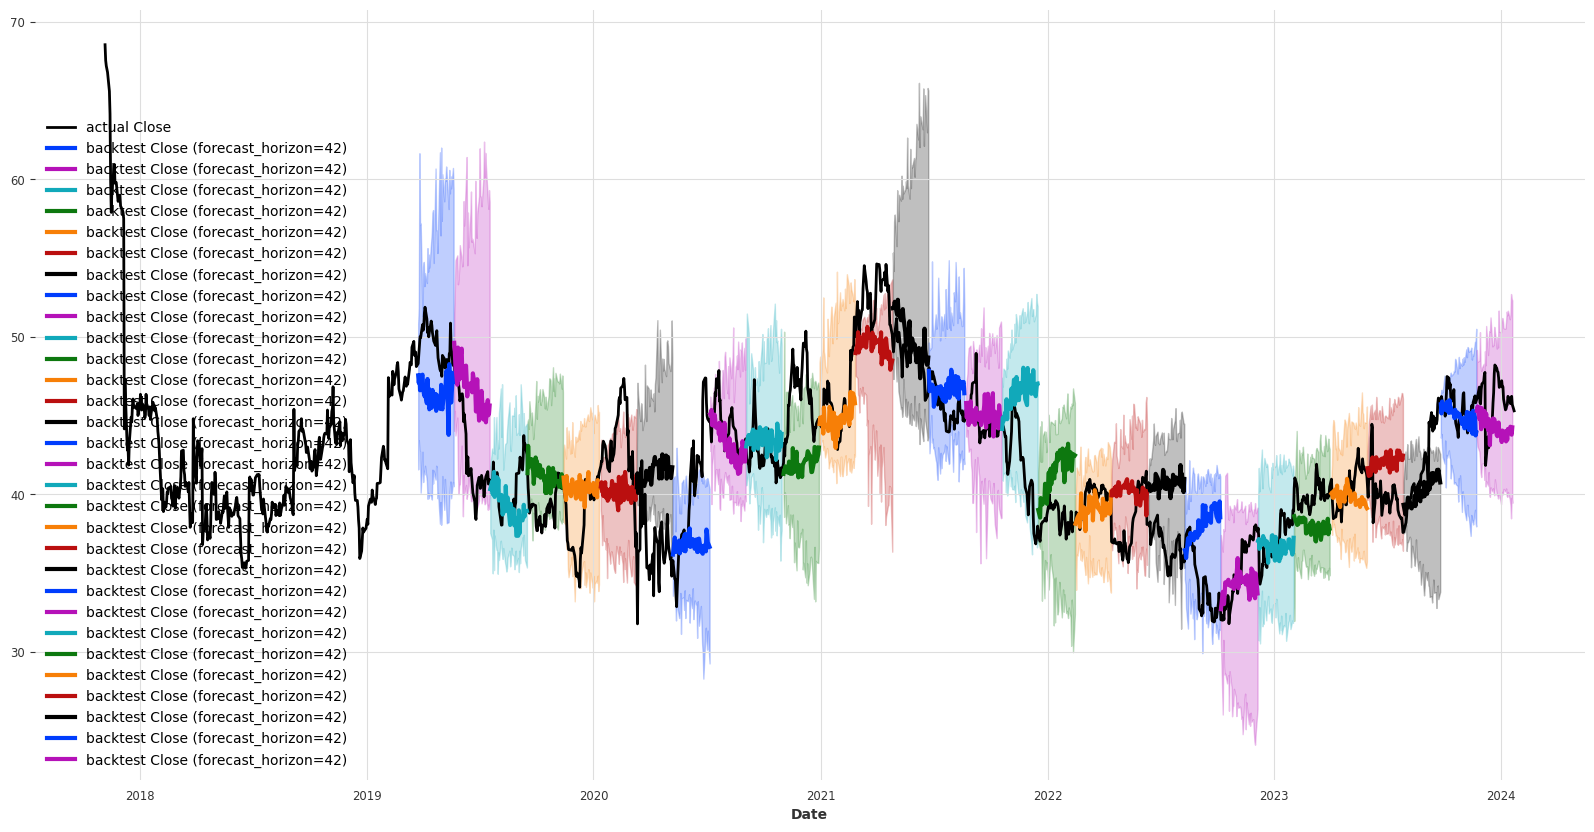

In [151]:
canswim_model.plot_backtest_results(target=canswim_model.targets_list[0], backtest=backtest, start=start_list[0], forecast_horizon=canswim_model.pred_horizon)    

In [119]:
assert False

AssertionError: 

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
if not canswim_model.load_model():
    # find and save the optimal model configuration
    canswim_model.find_model()

## Train model

### Run model training loop

In [ ]:

# train loop
for i in range(10):
    # align all data series for training
    canswim_model.train()
    # save model checkpoint
    canswim_model.save()
    # quick test progress at modelcheckpoing
    canswim_model.test()
    canswim_model.plot_test_results()    
    # thorough backtest of model checkpoint
    backtest, test_error = canswim_model.backtest()        
    print(f"Backtest Quantile Loss = {test_error}")
    canswim_model.plot_backtest_results(backtest)    
    # prepare next sample subset
    prepare_data()
